In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, prepare_train_dataset, prepare_valid_dataset
from functions.model_running import \
    run_model, \
    get_run_number, \
    increment_run_number,\
    preserve_best_runs
from functions.plotting import plot_single_output_history
from models.inception_resnet_v2_models import get_basic_model

WIDTH = 150
HEIGHT = 150

In [2]:
data_dir = os.path.join(
    '..',
    '..',
    '..',
    '..',
    '..',
    'data2',
    'images_original_inception_resnet_v2_150x150_categorized_no_test')
train_dataset = load_dataset(HEIGHT, WIDTH, data_dir, 'training')
valid_dataset = load_dataset(HEIGHT, WIDTH, data_dir, 'validation')

Found 21024 files belonging to 8 classes.
Found 4307 files belonging to 8 classes.


In [3]:
MODEL_NAME_BASE = 'inception_ignoring_imbalance_1_whole_model_trainable'
num_classes = len(train_dataset.class_names)
run_number = get_run_number(MODEL_NAME_BASE)

In [4]:
data_augmentation = get_augmentation_layers()
train_dataset = prepare_train_dataset(train_dataset, data_augmentation)
valid_dataset = prepare_valid_dataset(valid_dataset)

In [5]:
model_name = f'{MODEL_NAME_BASE}_{run_number}'
history = run_model(
    train_dataset,
    valid_dataset,
    lambda: get_basic_model(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', '..', '..', 'tmp_models', model_name + '_{epoch}'),
    os.path.join('..', '..', '..', '..', 'tensor_logs', model_name),
    monitor='val_loss',
    reduction_patience=10,
    stopping_patience=20)

657/657 [==============================] - ETA: 0s - loss: 1.5989 - accuracy: 0.5909

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_1_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_1_1\assets


657/657 [==============================] - 232s 315ms/step - loss: 1.5989 - accuracy: 0.5909 - val_loss: 73.6676 - val_accuracy: 0.6039 - lr: 0.0010


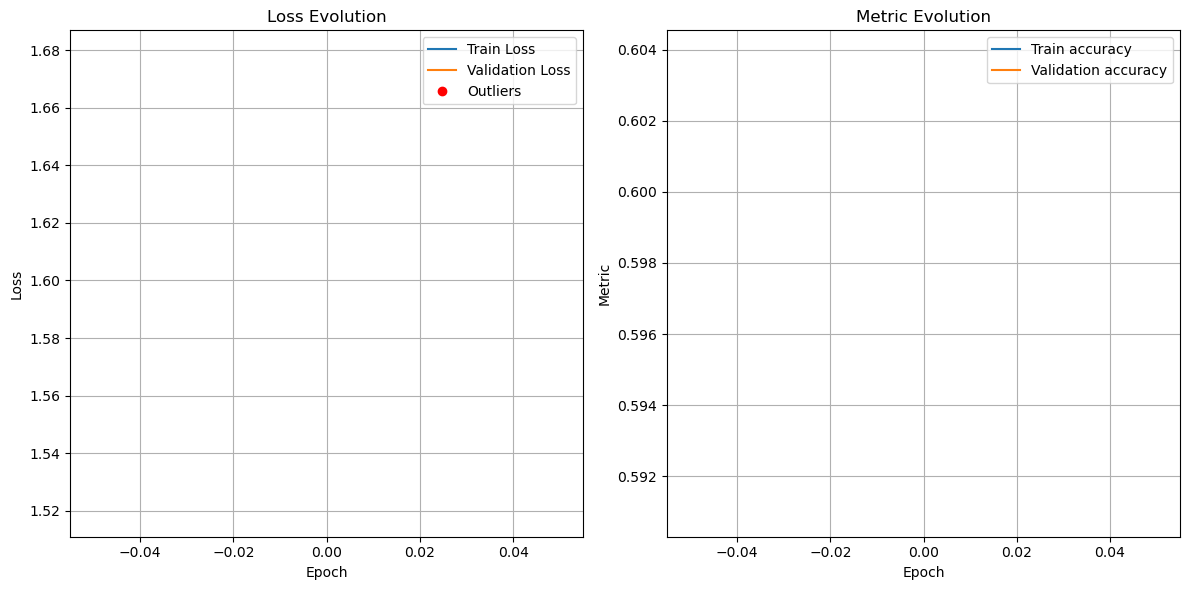

In [6]:
increment_run_number(MODEL_NAME_BASE)
preserve_best_runs(
    os.path.join('..', '..', '..', '..', 'tmp_models'),
    os.path.join('..', '..', '..', '..', 'models'))
plot_single_output_history(history.history)